In [1]:
using LinearAlgebra
using QuadGK
using Plots

In [2]:
maxevals = 10^2;

In [3]:
quadgk((x)->x^2,0,1; maxevals)

(0.3333333333333333, 0.0)

$$
\pi Q = 0
$$

$$
Q^\top \pi^\top = 0 
$$

$$
{\mathbf 1}^\top \pi^\top = 1
$$

In [4]:
Q = [-2 1.0 1;
      1 -2 1;
      2 2 -4]

D = [1 1 0.5;
     0.5 0 1;
      2 1 0];

In [5]:
b = vcat(zeros(2), ones(1));
A = vcat(Q'[1:2,:], ones(3)')

3×3 Matrix{Float64}:
 -2.0   1.0  2.0
  1.0  -2.0  2.0
  1.0   1.0  1.0

In [6]:
π_vec = round.(A \ b, digits=2)'

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 0.4  0.4  0.2

In [7]:
π_vec*Q

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 0.0  0.0  0.0

In [8]:
one_vec = ones(3);
one_vec_6 = ones(6); #usefull for 2p (MTCP)

## Checking Sylvester equation

In [9]:
M0(t) = exp(Q*t)

M0 (generic function with 1 method)

In [10]:
M1(t) = quadgk((u1)->exp(Q*u1)*D*exp(Q*(t-u1)), 0, t; maxevals = maxevals)[1]

M1 (generic function with 1 method)

In [13]:
Q*M1(2.5) - M1(2.5)*Q 

3×3 Matrix{Float64}:
  0.000137339  -0.399724      0.0998623
  0.399724     -0.000137339   0.300136
 -0.200274     -0.599723     -8.88178e-16

In [14]:
1*(M0(2.5)*D-D*M0(2.5))

3×3 Matrix{Float64}:
  0.000137339  -0.399724     0.0998623
  0.399724     -0.000137339  0.300136
 -0.200274     -0.599723     1.11022e-16

In [23]:
M2(t) = 2*quadgk((u)->M1(u)*D*exp(Q*(t-u)), 0, t; maxevals = maxevals)[1]

M2 (generic function with 1 method)

In [24]:
M2(2.5)

3×3 Matrix{Float64}:
 13.2192  11.9205  6.66159
 11.974   10.7637  6.034
 13.4158  12.1085  6.76013

In [29]:
M2a(t) = 2*quadgk((u)->exp(Q*(t-u))*D*M1(u), 0, t; maxevals = maxevals)[1]

M2a (generic function with 1 method)

In [30]:
M2a(2.5)

3×3 Matrix{Float64}:
 13.2192  11.9205  6.66159
 11.974   10.7637  6.034
 13.4158  12.1085  6.76013

In [25]:
Q*M2(2.5) - M2(2.5)*Q 

3×3 Matrix{Float64}:
  0.1462   -3.67018     0.977596
  3.80333  -0.0130504   2.75198
 -2.07397  -5.78463    -0.13315

In [26]:
2*(M1(2.5)*D-D*M1(2.5))

3×3 Matrix{Float64}:
  0.1462   -3.67018     0.977596
  3.80333  -0.0130504   2.75198
 -2.07397  -5.78463    -0.13315

## Third moment

$$
M_3(t)  = 6 \int_0^t \int_0^{u_3} 
\underbrace{\int_0^{u_2} 
\underbrace{e^{Q u_1} D e^{Q (u_2 - u_1)} D e^{Q (u_3 - u_2)} D e^{Q (t - u_3)}}_{I_0(u_1,u_2,u_3)} \, du_1}_{I_1} \, du_2 \, du_3.
$$

In [9]:
maxevals = 10^3;
I0(u1,u2,u3,t) = exp(Q*u1)*D*exp(Q*(u2-u1))*D*exp(Q*(u3-u2))*D*exp(Q*(t-u3))
I1(u2,u3,t) = quadgk((u1)->I0(u1,u2,u3,t), 0, u2; maxevals = maxevals)[1]
I2(u3,t) = quadgk((u2)->I1(u2,u3,t), 0, u3; maxevals = maxevals)[1]
I3(t) = quadgk((u3)->I2(u3,t),0,t; maxevals = maxevals)[1]
M3(t) = 6*I3(t)
third_moment(t) = π_vec*M3(t)*one_vec

third_moment (generic function with 1 method)

In [10]:
@time third_moment(1.1)

 25.763746 seconds (278.61 M allocations: 13.123 GiB, 4.83% gc time, 99.89% compilation time)


15.077745680967237

#### Also doing second moment - just to be sure

$$
M_2(t)  = 2 \int_0^t \int_0^{u_2} e^{Q u_1} D e^{Q (u_2 - u_1)} D e^{Q (t - u_2)} \, du_1 \, du_2, \\
$$

$$
\text{Var}_{\boldsymbol{\pi}}(N(t))=\boldsymbol{\pi}M_2(t) \mathbf{1}+\boldsymbol{\pi}M_1(t) \mathbf{1}-(\boldsymbol{\pi}M_1(t) \mathbf{1})^2.
$$

In [1]:
maxevals = 10^3;
I0_2(u1,u2,t) = exp(Q*u1)*D*exp(Q*(u2-u1))*D*exp(Q*(t-u2))
I1_2(u2,t) = quadgk((u1)->I0_2(u1,u2,t), 0, u2; maxevals = maxevals)[1]
I2_2(t) = quadgk((u2)->I1_2(u2,t), 0, t; maxevals = maxevals)[1]
M2(t) = 2*I2_2(t)
brute_second_moment(t) = π_vec*M2(t)*one_vec

brute_second_moment (generic function with 1 method)

In [12]:
@time brute_second_moment(1.1)

  0.180277 seconds (1.34 M allocations: 67.588 MiB, 6.38% gc time, 99.48% compilation time)


6.017913784781134

In [ ]:
brute_second_moment(t) = π_vec*M2(t)*one_vec

## Deviation Matrices

In [13]:
Q⁻ = inv(one_vec*π_vec - Q) #fundamental matrix

3×3 Matrix{Float64}:
 0.586667  0.253333  0.16
 0.253333  0.586667  0.16
 0.32      0.32      0.36

In [14]:
Dʰ = Q⁻-one_vec*π_vec

3×3 Matrix{Float64}:
  0.186667  -0.146667  -0.04
 -0.146667   0.186667  -0.04
 -0.08      -0.08       0.16

In [15]:
Dʰ*one_vec #should be 0

3-element Vector{Float64}:
 -1.1102230246251565e-16
 -2.498001805406602e-16
 -2.7755575615628914e-16

In [16]:
π_vec*Dʰ#should be 0

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 -4.94604e-17  -1.02196e-16  -5.65104e-17

In [17]:
Dʰₜ(t) = Dʰ*(I-exp(Q*t))

Dʰₜ (generic function with 1 method)

In [18]:
numerical_check_trans_deviation(t) = quadgk((u)->(exp(Q*u) - one_vec*π_vec), 0,t)[1]

numerical_check_trans_deviation (generic function with 1 method)

In [19]:
numerical_check_trans_deviation(1.3)

3×3 Matrix{Float64}:
  0.183263   -0.143323   -0.0399399
 -0.143323    0.183263   -0.0399399
 -0.0798797  -0.0798797   0.159759

In [20]:
Dʰₜ(1.3)

3×3 Matrix{Float64}:
  0.183263   -0.143323   -0.0399399
 -0.143323    0.183263   -0.0399399
 -0.0798797  -0.0798797   0.159759

### First moment and its integral

$$
M_1(t) = \int_0^t e^{Q u_1} D e^{Q (t - u_1)} \, du_1
$$


In [21]:
m1_integrand(u1,t) = exp(Q*u1)*D*exp(Q*(t-u1))
m1(t) = quadgk((u1)->m1_integrand(u1,t), 0, t, maxevals = maxevals)[1];

In [22]:
m1(2.3)

3×3 Matrix{Float64}:
 2.12496  1.99241  1.06913
 1.99216  1.85846  1.00288
 2.13876  2.00526  1.07598

In [23]:
integral_m1(t) = quadgk(m1, 0, t, maxevals = maxevals)[1];

In [24]:
integral_m1(200.3)

3×3 Matrix{Float64}:
 17673.1  17646.5  8837.87
 17646.4  17619.7  8824.59
 17675.8  17649.1  8839.2

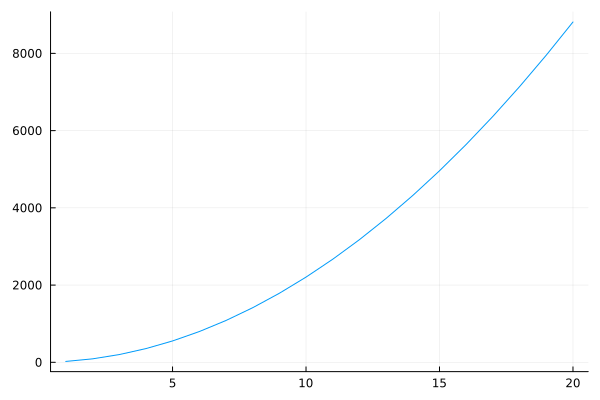

In [25]:
plot([integral_m1(t)[3,3] for t in 10:10:200], label=false)

### Checking our expressions

In [26]:
πD1 = π_vec*D*one_vec

2.2

In [27]:
πD = π_vec*D

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 1.0  0.6  0.6

In [28]:
D1 = D*one_vec

3-element Vector{Float64}:
 2.5
 1.5
 3.0

##### Second moment

$$
\boldsymbol{\pi} M_2(t) \mathbf{1} =
 (\boldsymbol{\pi} D  \mathbf{1} )^2 t^2 
 +  2\boldsymbol{\pi} D D^{\sharp}_{Q}  D \mathbf{1}t
 -  2 \boldsymbol{\pi} D D^{\sharp}_{Q}  D^{\sharp}_{Q}(t)
 D \mathbf{1}
$$

In [29]:
our_second_moment(t) = πD1^2*t^2 + 2πD*Dʰ*D1*t - 2*π_vec*D*Dʰ*Dʰₜ(t)*D1;

In [30]:
our_second_moment(2.3)

26.00026714235093

In [31]:
second_moment(2.3)

26.000267142350936

In [32]:
t_range = 1:0.5:10
ours = [our_second_moment(t) for t in t_range]
numerical = [second_moment(t) for t in t_range]
for (i,t) in enumerate(t_range)
    # @show t, ours[i], numerical[i], ours[i]- numerical[i]
    @show t, ours[i]- numerical[i]

end

(t, ours[i] - numerical[i]) = (1.0, -2.6645352591003757e-15)
(t, ours[i] - numerical[i]) = (1.5, 0.0)
(t, ours[i] - numerical[i]) = (2.0, -3.552713678800501e-15)
(t, ours[i] - numerical[i]) = (2.5, -7.105427357601002e-15)
(t, ours[i] - numerical[i]) = (3.0, 0.0)
(t, ours[i] - numerical[i]) = (3.5, -1.4210854715202004e-14)
(t, ours[i] - numerical[i]) = (4.0, 0.0)
(t, ours[i] - numerical[i]) = (4.5, 0.0)
(t, ours[i] - numerical[i]) = (5.0, -2.842170943040401e-14)
(t, ours[i] - numerical[i]) = (5.5, 0.0)
(t, ours[i] - numerical[i]) = (6.0, 5.684341886080802e-14)
(t, ours[i] - numerical[i]) = (6.5, 2.842170943040401e-14)
(t, ours[i] - numerical[i]) = (7.0, 2.842170943040401e-14)
(t, ours[i] - numerical[i]) = (7.5, 0.0)
(t, ours[i] - numerical[i]) = (8.0, 5.684341886080802e-14)
(t, ours[i] - numerical[i]) = (8.5, 5.684341886080802e-14)
(t, ours[i] - numerical[i]) = (9.0, 1.1368683772161603e-13)
(t, ours[i] - numerical[i]) = (9.5, -1.7053025658242404e-13)
(t, ours[i] - numerical[i]) = (10.0,

##### Third moment

#### Exploring the integral of M1
Seems like integral components grow qudaratically but our bilinear form of it grows linearly

In [33]:
integral_m1(100)

3×3 Matrix{Float64}:
 4410.08  4396.83  2205.7
 4396.8   4383.49  2199.1
 4411.47  4398.14  2206.36

In [34]:
integral_m1(1000)

3×3 Matrix{Float64}:
      4.40097e5  4.39969e5  220055.0
      4.39969e5  4.39841e5       2.19991e5
 440110.0        4.39982e5       2.20061e5

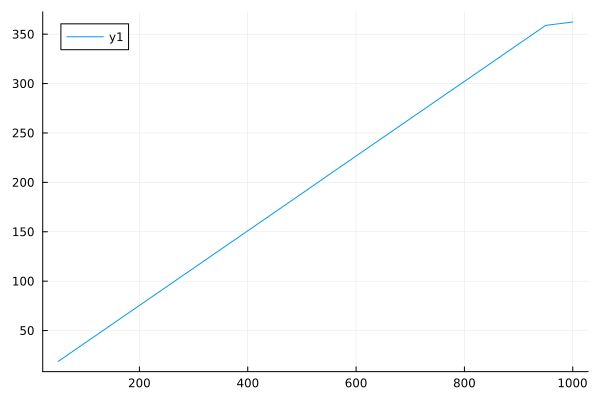

In [35]:
plot( 50:50:1000, [6πD*Dʰ*integral_m1(t)*D1 for t in 50:50:1000]) #numerical issue at about t=1000

In [36]:
Dstar = Dʰ*D*Dʰ - one_vec*πD*Dʰ^2
our_m3_order_3(t) = πD1^3*t^3
our_m3_order_2(t) = 6πD1*πD*Dʰ*D1*t^2 
our_m3_order_1(t) = +6πD*Dstar*D1*t - 6πD*Dʰ*integral_m1(t)*D1
our_m3_order_0(t) = -6πD*Dstar*Dʰₜ(t)*D1;

In [37]:
our_third_moment(t) = our_m3_order_3(t) + our_m3_order_2(t) + our_m3_order_1(t) + our_m3_order_0(t);

In [38]:
t_range = 1:0.5:10
ours = [our_third_moment(t) for t in t_range]
numerical = [third_moment(t) for t in t_range]
for (i,t) in enumerate(t_range)
    # @show t, ours[i], numerical[i]
    @show t, ours[i] - numerical[i]
end

(t, ours[i] - numerical[i]) = (1.0, -3.552713678800501e-15)
(t, ours[i] - numerical[i]) = (1.5, 7.105427357601002e-15)
(t, ours[i] - numerical[i]) = (2.0, -1.4210854715202004e-14)
(t, ours[i] - numerical[i]) = (2.5, -2.842170943040401e-14)
(t, ours[i] - numerical[i]) = (3.0, 0.0)
(t, ours[i] - numerical[i]) = (3.5, 0.0)
(t, ours[i] - numerical[i]) = (4.0, 1.1368683772161603e-13)
(t, ours[i] - numerical[i]) = (4.5, 1.1368683772161603e-13)
(t, ours[i] - numerical[i]) = (5.0, 4.547473508864641e-13)
(t, ours[i] - numerical[i]) = (5.5, 4.547473508864641e-13)
(t, ours[i] - numerical[i]) = (6.0, 4.547473508864641e-13)
(t, ours[i] - numerical[i]) = (6.5, 1.3642420526593924e-12)
(t, ours[i] - numerical[i]) = (7.0, 4.547473508864641e-13)
(t, ours[i] - numerical[i]) = (7.5, 2.7284841053187847e-12)
(t, ours[i] - numerical[i]) = (8.0, 1.8189894035458565e-12)
(t, ours[i] - numerical[i]) = (8.5, 2.7284841053187847e-12)
(t, ours[i] - numerical[i]) = (9.0, 8.185452315956354e-12)
(t, ours[i] - numerical

# SMMPP vs MMTCP

In [39]:
λ = [3.0, 4.0, 5.0]; #Can be any vector of positive values (MMPP)
Q_mmpp = [-2.0 1.0 1;
          1 -2 1;
          2 2 -4]; #Can be any generator matrix (MMPP)

In [40]:
D_mmpp = Diagonal(λ) #MMPP

3×3 Diagonal{Float64, Vector{Float64}}:
 3.0   ⋅    ⋅ 
  ⋅   4.0   ⋅ 
  ⋅    ⋅   5.0

In [41]:
C_mmpp = Q_mmpp - D_mmpp

3×3 Matrix{Float64}:
 -5.0   1.0   1.0
  1.0  -6.0   1.0
  2.0   2.0  -9.0

In [42]:
s_mmpp = [sum(Q_mmpp[i,j] for j in setdiff(1:3,i)) for i in 1:3]

3-element Vector{Float64}:
 2.0
 2.0
 4.0

In [43]:
all(s_mmpp .< λ) #check we have a slow MMPP

true

In [44]:
Λ(i) = [-λ[i] λ[i]-s_mmpp[i];
        λ[i]-s_mmpp[i] -λ[i]]
H(i,j) = Diagonal(fill(Q_mmpp[i,j],2))

H (generic function with 1 method)

In [45]:
Λ(3)

2×2 Matrix{Float64}:
 -5.0   1.0
  1.0  -5.0

In [46]:
H(3,2)

2×2 Diagonal{Float64, Vector{Float64}}:
 2.0   ⋅ 
  ⋅   2.0

In [47]:
Q_mtcp = zeros(2*3, 2*3)

6×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [48]:
for i in 1:3
    for j in 1:3
        #i and j are block indexes the actual indexes are h and k
        h = 2*(i-1)+1
        k = 2*(j-1)+1
        if i == j
            Q_mtcp[h:h+1,k:k+1] = Λ(i)
        else
            Q_mtcp[h:h+1,k:k+1] = H(i,j)
        end
    end
end
Q_mtcp

6×6 Matrix{Float64}:
 -3.0   1.0   1.0   0.0   1.0   0.0
  1.0  -3.0   0.0   1.0   0.0   1.0
  1.0   0.0  -4.0   2.0   1.0   0.0
  0.0   1.0   2.0  -4.0   0.0   1.0
  2.0   0.0   2.0   0.0  -5.0   1.0
  0.0   2.0   0.0   2.0   1.0  -5.0

In [49]:
D_mtcp = Q_mtcp-Diagonal(Q_mtcp)

6×6 Matrix{Float64}:
 0.0  1.0  1.0  0.0  1.0  0.0
 1.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  2.0  1.0  0.0
 0.0  1.0  2.0  0.0  0.0  1.0
 2.0  0.0  2.0  0.0  0.0  1.0
 0.0  2.0  0.0  2.0  1.0  0.0

In [50]:
C_mtcp = Q_mtcp-D_mtcp

6×6 Matrix{Float64}:
 -3.0   0.0   0.0   0.0   0.0   0.0
  0.0  -3.0   0.0   0.0   0.0   0.0
  0.0   0.0  -4.0   0.0   0.0   0.0
  0.0   0.0   0.0  -4.0   0.0   0.0
  0.0   0.0   0.0   0.0  -5.0   0.0
  0.0   0.0   0.0   0.0   0.0  -5.0

In [51]:
b_mmpp = vcat(zeros(2), ones(1));
A_mmpp = vcat(Q_mmpp'[1:2,:], ones(3)')
π_vec_mmpp = round.(A_mmpp \ b_mmpp, digits=2)'

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 0.4  0.4  0.2

In [52]:
b_mtcp = vcat(zeros(5), ones(1));
A_mtcp = vcat(Q_mtcp'[1:5,:], ones(6)')
π_vec_mtcp = round.(A_mtcp \ b_mtcp, digits=2)'

1×6 adjoint(::Vector{Float64}) with eltype Float64:
 0.2  0.2  0.2  0.2  0.1  0.1

In [53]:
Q⁻_mmpp = inv(one_vec*π_vec_mmpp - Q_mmpp) #fundamental matrix

3×3 Matrix{Float64}:
 0.586667  0.253333  0.16
 0.253333  0.586667  0.16
 0.32      0.32      0.36

In [54]:
Q⁻_mtcp = inv(one_vec_6*π_vec_mtcp - Q_mtcp) #fundamental matrix

6×6 Matrix{Float64}:
 0.442456   0.144211   0.161754   0.0915789  0.110702   0.0492982
 0.144211   0.442456   0.0915789  0.161754   0.0492982  0.110702
 0.161754   0.0915789  0.389825   0.196842   0.10193    0.0580702
 0.0915789  0.161754   0.196842   0.389825   0.0580702  0.10193
 0.221404   0.0985965  0.20386    0.11614    0.280877   0.0791228
 0.0985965  0.221404   0.11614    0.20386    0.0791228  0.280877

In [55]:
Dʰ_mmpp = Q⁻_mmpp-one_vec*π_vec_mmpp

3×3 Matrix{Float64}:
  0.186667  -0.146667  -0.04
 -0.146667   0.186667  -0.04
 -0.08      -0.08       0.16

In [56]:
Dʰ_mtcp = Q⁻_mtcp-one_vec_6*π_vec_mtcp

6×6 Matrix{Float64}:
  0.242456   -0.0557895  -0.0382456   -0.108421     0.0107018   -0.0507018
 -0.0557895   0.242456   -0.108421    -0.0382456   -0.0507018    0.0107018
 -0.0382456  -0.108421    0.189825    -0.00315789   0.00192982  -0.0419298
 -0.108421   -0.0382456  -0.00315789   0.189825    -0.0419298    0.00192982
  0.0214035  -0.101404    0.00385965  -0.0838596    0.180877    -0.0208772
 -0.101404    0.0214035  -0.0838596    0.00385965  -0.0208772    0.180877

In [57]:
Dʰ_mmpp*one_vec #should be 0

3-element Vector{Float64}:
 -1.1102230246251565e-16
 -2.498001805406602e-16
 -2.7755575615628914e-16

In [58]:
Dʰ_mtcp*one_vec_6 #should be 0

6-element Vector{Float64}:
 -2.0816681711721685e-16
 -1.8041124150158794e-16
 -1.942890293094024e-16
 -1.5265566588595902e-16
 -1.942890293094024e-16
 -2.220446049250313e-16

In [59]:
π_vec_mmpp*Dʰ_mmpp#should be 0

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 -4.94604e-17  -1.02196e-16  -5.65104e-17

In [60]:
π_vec_mtcp*Dʰ_mtcp#should be 0

1×6 adjoint(::Vector{Float64}) with eltype Float64:
 -5.0176e-17  -3.76982e-17  -2.47516e-17  …  -1.86774e-17  -2.67515e-17

In [61]:
Dʰₜ_mmpp(t) = Dʰ_mmpp*(I-exp(Q_mmpp*t))

Dʰₜ_mmpp (generic function with 1 method)

In [62]:
Dʰₜ_mmpp(2.3)

3×3 Matrix{Float64}:
  0.186498   -0.146499   -0.0399996
 -0.146499    0.186498   -0.0399996
 -0.0799992  -0.0799992   0.159998

In [63]:
Dʰₜ_mtcp(t) = Dʰ_mtcp*(I-exp(Q_mtcp*t))

Dʰₜ_mtcp (generic function with 1 method)

In [64]:
πD1_mmpp = π_vec_mmpp*D_mmpp*one_vec

3.8000000000000003

In [65]:
πD1_mtcp = π_vec_mtcp*D_mtcp*one_vec_6

3.8

In [66]:
πD_mmpp = π_vec_mmpp*D_mmpp

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 1.2  1.6  1.0

In [67]:
πD_mtcp = π_vec_mtcp*D_mtcp

1×6 adjoint(::Vector{Float64}) with eltype Float64:
 0.6  0.6  0.8  0.8  0.5  0.5

In [68]:
D1_mmpp = D_mmpp*one_vec

3-element Vector{Float64}:
 3.0
 4.0
 5.0

In [69]:
D1_mtcp = D_mtcp*one_vec_6

6-element Vector{Float64}:
 3.0
 3.0
 4.0
 4.0
 5.0
 5.0

In [70]:
π_vec_mmpp*D1_mmpp - π_vec_mtcp*D1_mtcp #just a check first moment

4.440892098500626e-16

In [71]:
our_second_moment_mmpp(t) = πD1_mmpp^2*t^2 + 2πD_mmpp*Dʰ_mmpp*D1_mmpp*t - 2*π_vec_mmpp*D_mmpp*Dʰ_mmpp*Dʰₜ_mmpp(t)*D1_mmpp;
our_second_moment_mtcp(t) = πD1_mtcp^2*t^2 + 2πD_mtcp*Dʰ_mtcp*D1_mtcp*t - 2*π_vec_mtcp*D_mtcp*Dʰ_mtcp*Dʰₜ_mtcp(t)*D1_mtcp;

In [72]:
maximum(abs,[our_second_moment_mmpp(t) - our_second_moment_mtcp(t) for t in 0:0.1:5]) #check variance

5.684341886080802e-14

In [73]:
Dstar_mmpp = Dʰ_mmpp*D_mmpp*Dʰ_mmpp - one_vec*πD_mmpp*Dʰ_mmpp^2

3×3 Matrix{Float64}:
  0.2336     -0.193067  -0.0405333
 -0.148622    0.202489  -0.0538667
 -0.0348444  -0.105956   0.1408

In [74]:
Dstar_mtcp = Dʰ_mtcp*D_mtcp*Dʰ_mtcp - one_vec_6*πD_mtcp*Dʰ_mtcp^2

6×6 Matrix{Float64}:
  0.0364707   0.0104627   0.0136575   -0.0600575    0.0336284  -0.0341617
  0.0104627   0.0364707  -0.0600575    0.0136575   -0.0341617   0.0336284
  0.0358797  -0.0378353   0.00290957   0.0129127    0.0166508  -0.0305175
 -0.0378353   0.0358797   0.0129127    0.00290957  -0.0305175   0.0166508
  0.0903679  -0.0452123   0.0341906   -0.0601461    0.0102907  -0.0294907
 -0.0452123   0.0903679  -0.0601461    0.0341906   -0.0294907   0.0102907

In [75]:
m1_integrand_mmpp(u1,t) = exp(Q_mmpp*u1)*D_mmpp*exp(Q_mmpp*(t-u1))
m1_mmpp(t) = quadgk((u1)->m1_integrand_mmpp(u1,t), 0, t, maxevals = maxevals)[1];

In [76]:
m1_integrand_mtcp(u1,t) = exp(Q_mtcp*u1)*D_mtcp*exp(Q_mtcp*(t-u1))
m1_mtcp(t) = quadgk((u1)->m1_integrand_mtcp(u1,t), 0, t, maxevals = maxevals)[1];

In [77]:
m1_mmpp(5.3)

3×3 Matrix{Float64}:
 7.87467  8.008    4.03067
 8.008    8.14133  4.09733
 8.06133  8.19467  4.124

In [78]:
m1_mtcp(5.3)

6×6 Matrix{Float64}:
 3.93734  3.93733  4.004    4.004    2.01533  2.01533
 3.93733  3.93734  4.004    4.004    2.01533  2.01533
 4.004    4.004    4.07067  4.07067  2.04867  2.04867
 4.004    4.004    4.07067  4.07067  2.04867  2.04867
 4.03067  4.03066  4.09733  4.09733  2.062    2.062
 4.03066  4.03067  4.09733  4.09733  2.062    2.062

In [79]:
integral_m1_mmpp(t) = quadgk(m1_mmpp, 0, t, maxevals = maxevals)[1];

In [80]:
integral_m1_mtcp(t) = quadgk(m1_mtcp, 0, t, maxevals = maxevals)[1];

In [81]:
our_m3_order_3_mmpp(t) = πD1_mmpp^3*t^3
our_m3_order_3_mtcp(t) = πD1_mtcp^3*t^3
our_m3_order_3_mmpp(1.0), our_m3_order_3_mtcp(1.0)

(54.87200000000001, 54.87199999999999)

In [82]:
our_m3_order_2_mmpp(t) = 6πD1_mmpp*πD_mmpp*Dʰ_mmpp*D1_mmpp*t^2 
our_m3_order_2_mtcp(t) = 6πD1_mtcp*πD_mtcp*Dʰ_mtcp*D1_mtcp*t^2 
our_m3_order_2_mmpp(1.0), our_m3_order_2_mtcp(1.0)

(3.161599999999927, 3.1615999999999387)

In [83]:
our_m3_order_1_mmpp(t) = +6πD_mmpp*Dstar_mmpp*D1_mmpp*t - 6πD_mmpp*Dʰ_mmpp*integral_m1_mmpp(t)*D1_mmpp
our_m3_order_1_mtcp(t) = +6πD_mtcp*Dstar_mtcp*D1_mtcp*t - 6πD_mtcp*Dʰ_mtcp*integral_m1_mtcp(t)*D1_mtcp
round(our_m3_order_1_mmpp(1.0), digits = 7), round(our_m3_order_1_mtcp(1.0), digits = 7) #order 1 is different!!!!

(-0.8106981, -1.4530108)

In [84]:
our_m3_order_0_mmpp(t) = -6πD_mmpp*Dstar_mmpp*Dʰₜ_mmpp(t)*D1_mmpp
our_m3_order_0_mtcp(t) = -6πD_mtcp*Dstar_mtcp*Dʰₜ_mtcp(t)*D1_mtcp
round(our_m3_order_0_mmpp(1.0), digits = 7), round(our_m3_order_0_mtcp(1.0), digits = 7)

(0.0095917, 0.2221046)

In [85]:
tt = 1000.0
round(our_m3_order_0_mmpp(tt), digits = 7), round(our_m3_order_0_mtcp(tt), digits = 7) #final constant term also differs

(0.0105813, 0.2303147)